In [55]:
import networkx as nx
import json
import numpy as np
import pickle
from pyvis.network import Network
import matplotlib.pyplot as plt
from pprint import pprint

In [56]:
# загружаем граф из файла
with open('out/graph.pickle', 'rb') as f:
    G = pickle.load(f)


In [57]:
print('Количество компонент связности:', nx.number_connected_components(G)) 

Количество компонент связности: 5409


In [58]:
exclude_one_nodes = G.copy()
exclude_one_nodes.remove_nodes_from(list(nx.isolates(exclude_one_nodes)))

In [59]:
print('Количество компонент связности без одиночных вершин:', nx.number_connected_components(exclude_one_nodes)) 

Количество компонент связности без одиночных вершин: 420


In [60]:
lens_of_components = sorted([len(el) for el in nx.connected_components(exclude_one_nodes)], reverse=True)
print('Размеры компонент связности:', lens_of_components)

Размеры компонент связности: [202, 22, 17, 11, 11, 9, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [61]:
def str_to_tuple(s):
    return tuple([el.lstrip() for el in s.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace("'", '').split(',')])

In [62]:
# Посмотрим как связываются вершины
with open('out/connections.csv', 'r', encoding='utf-8') as f:
    connections = f.read().split('\n')[1:]

connections = list(map(lambda x: (x[0], x[1], str_to_tuple(x[2])), [el.split('\t') for el in connections if el != '']))

In [63]:
phone_connections = list(filter(lambda x: x[2][0] == 'phone', connections))
email_connections = list(filter(lambda x: x[2][0] == 'email', connections))
inn_connections = list(filter(lambda x: x[2][0] == 'ИНН', connections))
ogrn_connections = list(filter(lambda x: x[2][0] == 'ОГРН', connections))

([<matplotlib.patches.Wedge at 0x11cb30e6910>,
 [Text(-1.0944296287728295, 0.11056123942940782, 'phone'),
  Text(1.0874209076501329, -0.1658787798525214, 'email'),
  Text(1.0968447919995006, -0.08325564403433894, 'ИНН'),
  Text(1.0996545255981438, -0.02756672507791624, 'ОГРН')])

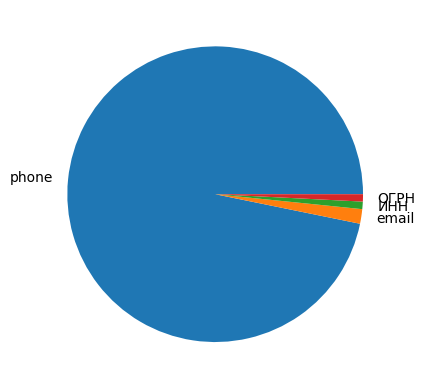

In [64]:
plt.pie([len(phone_connections), len(email_connections), len(inn_connections), len(ogrn_connections)], labels=['phone', 'email', 'ИНН', 'ОГРН'])

In [65]:
print('phone connections:', len(phone_connections))
print('email connections:', len(email_connections))
print('ИНН connections:', len(inn_connections))
print('ОГРН connections:', len(ogrn_connections))
print('total connections:', len(connections))

phone connections: 42708
email connections: 702
ИНН connections: 360
ОГРН connections: 352
total connections: 44122


В основном сайты связаны через номер телефона. Делаем вывод, что застройщики обычно не меняют номер телефона для разных сайтов и используют централизрованные номера телефонов, которые приходят в одну "точку"

In [66]:
print('ТОП-3 групп по количеству связей:', *sorted(nx.connected_components(exclude_one_nodes), key=len, reverse=True)[:3], sep='\n\n')

ТОП-3 групп по количеству связей:

{'avani-palm-view.com.html', 'cherrywoods-meraas.ae.html', 'apartments-dubai.sale.html', 'dubai-luxury.property.html', 'oakley-square.ae.html', 'downtown-dubai-properties.com.html', 'zada-tower.ae.html', 'the-highbury.ae.html', 'dubai-marina-shores.ae.html', 'yas-golf-collection-aldar.ae.html', 'grove-fountain-views.ae.html', 'nice-damac-lagoons.ae.html', 'the-8.ae.html', 'damac-lagoons.properties.html', 'six-senses-the-palm.com.html', 'rukan-lofts.ae.html', 'gardens-plaza.ae.html', 'w-residences-dubai.com.html', 'costa-brava-damac-lagoons.ae.html', 'elite-downtown-residence.ae.html', 'elitz-danube.ae.html', 'fairmont-the-palm.ae.html', 'zuha-al-barari.com.html', 'amalfi-villas.ae.html', 'monte-carlo-damac-lagoons.com.html', 'wasl-1-residences.com.html', 'anantara-the-palm-dubai.com.html', 'kempinski-residences-dubai.ae.html', 'belair-damac-hills.ae.html', 'nara-the-valley.com.html', 'one-zaabeel.sale.html', 'damac-properties.sale.html', 'sobha-1.com.

In [67]:
# Разобьем связи по группам и посмотрим на них
sorted_exclude =sorted(list(map(lambda x: list(x), nx.connected_components(exclude_one_nodes))), key=len, reverse=True)
grouped_connections = [{'phone': set(), 'email': set(), 'ИНН': set(), 'ОГРН': set()} for _ in range(len(sorted_exclude))]
for site1, site2, val in connections:
    ind_site1 = [ind for ind, el in enumerate(sorted_exclude) if site1 in el]
    ind_site2 = [ind for ind, el in enumerate(sorted_exclude) if site2 in el]
    if len(ind_site1) > 0:
        grouped_connections[ind_site1[0]][val[0]].add(val[1])
    if len(ind_site2) > 0:
        grouped_connections[ind_site2[0]][val[0]].add(val[1])

In [68]:
# Какие способы использутся для связи сайтов (в порядке убывания количества связей)
connection_ways = list()
for connections in grouped_connections:
    out = [el[0] for el in connections.items() if len(el[1]) > 0]
    connection_ways.append(out)

for ind, el in enumerate(connection_ways):
    print(ind, el)

0 ['phone']
1 ['phone']
2 ['ИНН', 'ОГРН']
3 ['phone']
4 ['phone']
5 ['phone']
6 ['phone', 'email']
7 ['phone', 'email']
8 ['phone', 'email']
9 ['phone']
10 ['phone']
11 ['phone', 'email']
12 ['email']
13 ['phone']
14 ['phone', 'email']
15 ['phone']
16 ['phone']
17 ['phone']
18 ['phone']
19 ['phone']
20 ['phone']
21 ['phone', 'email']
22 ['phone', 'email']
23 ['phone']
24 ['phone']
25 ['phone', 'email']
26 ['phone', 'email']
27 ['phone']
28 ['phone']
29 ['phone']
30 ['email']
31 ['phone', 'ИНН', 'ОГРН']
32 ['ИНН', 'ОГРН']
33 ['phone', 'ИНН', 'ОГРН']
34 ['phone', 'email']
35 ['email', 'ИНН', 'ОГРН']
36 ['phone']
37 ['phone']
38 ['email']
39 ['phone']
40 ['email']
41 ['phone', 'email']
42 ['phone', 'email']
43 ['phone']
44 ['phone']
45 ['phone']
46 ['phone']
47 ['phone', 'email']
48 ['phone']
49 ['phone']
50 ['phone']
51 ['phone', 'email']
52 ['phone', 'email']
53 ['phone']
54 ['phone']
55 ['phone']
56 ['phone', 'email']
57 ['phone']
58 ['phone']
59 ['phone']
60 ['phone', 'email', 'ИНН', 

In [69]:
# Размер самой большой компоненты связности по номеру
print('Размер самой большой компоненты связности по номеру:', len(sorted_exclude[min(map(lambda x: x[0], filter(lambda x: 'phone' in x[1], enumerate(connection_ways))))]))
# Размер самой большой компоненты связности по email
print('Размер самой большой компоненты связности по email:', len(sorted_exclude[min(map(lambda x: x[0], filter(lambda x: 'email' in x[1], enumerate(connection_ways))))]))
# Размер самой большой компоненты связности по ИНН
print('Размер самой большой компоненты связности по ИНН:',  len(sorted_exclude[min(map(lambda x: x[0], filter(lambda x: 'ИНН' in x[1], enumerate(connection_ways))))]))
# Размер самой большой компоненты связности по ОГРН
print('Размер самой большой компоненты связности по ОГРН:',  len(sorted_exclude[min(map(lambda x: x[0], filter(lambda x: 'ОГРН' in x[1], enumerate(connection_ways))))]))

Размер самой большой компоненты связности по номеру: 202
Размер самой большой компоненты связности по email: 7
Размер самой большой компоненты связности по ИНН: 17
Размер самой большой компоненты связности по ОГРН: 17


In [70]:
# Сохраняем граф в файл
nt = Network(notebook=True)
nt.show_buttons(filter_=['physics'])
nt.from_nx(exclude_one_nodes)
nt.show('out/nx.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
